# Time Series

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## What is a Time Series?
+ Definition:
A time series is a set of observations collected sequentially over time. Common examples include stock prices, weather data, sensor readings, and website traffic.

+ Key Characteristics:

    + Temporal Order: The order of observations matters.
    + Trends: Long-term increases or decreases in the data.
    + Seasonality: Regular, periodic fluctuations (e.g., daily, monthly, yearly).
    + Cyclic Patterns: Fluctuations that are not of fixed period.
    + Noise: Random variability that can obscure patterns.

## Why Use Time Series Analysis?
+ Forecasting:  
Time series analysis enables predicting future values based on historical trends. This is crucial in fields like finance, economics, and demand planning.
+ Trend and Seasonality Detection:  
Understanding trends and seasonal effects helps in making strategic decisions, such as optimizing inventory levels or planning marketing campaigns.
+ Anomaly Detection:  
Time series methods can help identify unusual patterns or outliers, which might indicate system failures or fraud.
+ Policy and Decision Making:  
Analyzing time-dependent data can inform policy decisions and operational strategies across many industries.

Related terms  
+ Timestamps: Specific instants in time.
+ Fixed periods: Such as the whole month of February 2025, or the whole year 2025.
+ Intervals of time: Indicated by a start and end timestamp. Periods can be thought of as special cases
 of intervals.
+ Experiment or elapsed time: Each timestamp is a measure of time relative to a particular start time (e.g., the diameter of a cookie baking each second since being placed in the oven), starting from 0.




## Date and Time Data Types and Tools

In [2]:
now = datetime.now()

In [3]:
now

datetime.datetime(2025, 9, 6, 13, 0, 29, 144438)

In [4]:
now.year, now.month, now.day

(2025, 9, 6)

datetime stores both the date and time down to the microsecond. datetime.time
 delta, or simply timedelta, represents the temporal difference between two date
 time objects:

In [5]:
d = datetime.now() - datetime(2025, 1, 23)

In [6]:
d

datetime.timedelta(days=226, seconds=46829, microseconds=171308)

In [7]:
d.days

226

In [8]:
d.seconds

46829

You can add (or subtract) a timedelta or multiple thereof to a datetime object to
 yield a new shifted object:

In [9]:
from datetime import timedelta

In [10]:
delta = timedelta(days = 123)

In [11]:
now

datetime.datetime(2025, 9, 6, 13, 0, 29, 144438)

In [12]:
now + delta

datetime.datetime(2026, 1, 7, 13, 0, 29, 144438)

In [13]:
now - delta

datetime.datetime(2025, 5, 6, 13, 0, 29, 144438)

In [14]:
now - 2 * delta

datetime.datetime(2025, 1, 3, 13, 0, 29, 144438)

Related terms:
+ Time: Represents a time (hour, minute, second, microsecond) independent of any day.
+ date: Represents a date (year, month, and day) without time. 
+ datetime: Combines a date and time.
+ timedelta: Represents the difference between two dates, times, or datetime objects.
+ tzinfo: Provide support for time zones.

###  Converting Between String and Datetime

Converting Strings to Datetime Objects:  
The strptime() method from the datetime module parses a string into a datetime object according to a specified format.
Syntax:  
```datetime_object = datetime.strptime(date_string, format)```

+ date_string: The date and/or time in string format.
+ format: A format string that specifies how to interpret the string. Common format directives include:
    + %Y: 4-digit year (e.g., 2023)
    + %m: 2-digit month (e.g., 08)
    + %d: 2-digit day (e.g., 15)
    + %H: 2-digit hour (24-hour clock)
    + %M: 2-digit minute
    + %S: 2-digit second
    + %f: Shortcut for %Y-%m-%d (e.g., 2012-4-18)
    + %D: Shortcut for %m/%d/%y (e.g., 04/18/12)

In [15]:
date_str = "2023-08-15 14:30:00"
dt = datetime.strptime(date_str, "%Y-%m-%d %H:%M:%S")

In [16]:
dt

datetime.datetime(2023, 8, 15, 14, 30)

In [17]:
dt.year

2023

In [18]:
dt.hour

14

Using Pandas pd.to_datetime()

In [19]:
date_str = "2023-08-15 14:30:00"
dt_pd = pd.to_datetime(date_str)

In [20]:
dt_pd

Timestamp('2023-08-15 14:30:00')

pd.to_datetime() is very powerful when you have a Series or DataFrame column with date strings, and it can often parse dates without you having to specify the exact format.

In [21]:
datestrs = ["7/6/2011", "8/6/2011"]
dtl = [datetime.strptime(dt, "%m/%d/%Y") for dt in datestrs]

In [22]:
dtl

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

In [23]:
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

Converting Datetime Objects to Strings  
Using datetime.strftime()  
``` date_string = datetime_object.strftime(format)```

In [24]:
now = datetime.now()

In [25]:
now.strftime("%B %d, %Y at %I:%M %p" )

'September 06, 2025 at 01:00 PM'

Using Pandas dt.strftime()

In [26]:
date_series = pd.to_datetime(pd.Series(["2023-08-15 14:30:00", "2023-09-10 09:15:00"]))

In [27]:
date_series

0   2023-08-15 14:30:00
1   2023-09-10 09:15:00
dtype: datetime64[ns]

In [28]:
date_series.dt.strftime("%B %d, %Y at %I:%M %p")

0       August 15, 2023 at 02:30 PM
1    September 10, 2023 at 09:15 AM
dtype: object

deep on pandas methods

1. pd.to_datetime()  
pd.to_datetime() converts a column (or a list/array) of date-like objects (usually strings) into Pandas datetime objects. This conversion allows you to perform time series operations (such as resampling, time-based indexing, and arithmetic) more efficiently.

Key Parameters
+ arg:
The data to convert (string, list, Series, DataFrame, etc.).

+ format (str, optional):
A string specifying the expected format of the date strings (e.g., "%Y-%m-%d %H:%M:%S"). Providing a format can speed up parsing and reduce errors.

+ infer_datetime_format (bool, default=False):  
If set to True, Pandas will attempt to infer the datetime format automatically, which can improve performance if the format is consistent.

+ errors (str, default='raise'):  
How to handle errors:

    + 'raise': Raise an exception for invalid parsing.  
    + 'coerce': Convert invalid parsing to NaT (Not a Time).  
    + 'ignore': Return the input if parsing fails.
+ dayfirst (bool, default=False):  
When parsing dates with ambiguous formats (e.g., "10/11/2020"), if True, it interprets the first number as the day.

+ utc (bool or string, default=None):
If True, converts the result to UTC time. You can also specify a timezone (e.g., "UTC").

In [29]:
date_str = "2023-08-15 14:30:00"
pd.to_datetime(date_str, format = "%Y-%m-%d %H:%M:%S")

Timestamp('2023-08-15 14:30:00')

In [30]:
s = pd.Series(["2023-08-15", "2023-09-10", "2023-10-05"])

In [31]:
s

0    2023-08-15
1    2023-09-10
2    2023-10-05
dtype: object

In [32]:
pd.to_datetime(s)

0   2023-08-15
1   2023-09-10
2   2023-10-05
dtype: datetime64[ns]

If your date strings follow a consistent but unknown format, you can let Pandas infer it:

In [33]:
date_series = pd.Series(["15/08/2023", "10/09/2023", "05/10/2023"])
pd.to_datetime(date_series, dayfirst=True)

0   2023-08-15
1   2023-09-10
2   2023-10-05
dtype: datetime64[ns]

If some date strings might be invalid, use the errors parameter:

In [34]:
date_series = pd.Series(["2023-08-15", "invalid_date", "2023-10-05"])
pd.to_datetime(date_series, errors='coerce')

0   2023-08-15
1          NaT
2   2023-10-05
dtype: datetime64[ns]

2. pd.dt.strftime()  
Once you have datetime objects, you might want to convert them back to strings in a specific format for reporting, display, or exporting. The dt.strftime() function is used on a Series of datetime objects to format each value as a string.

Key Parameter
+ format (str):  
The format string using directives similar to those in datetime.strftime(). For example:
    + %Y: 4-digit year.
    + %m: 2-digit month.
    + %d: 2-digit day.
    + %H: Hour (24-hour clock).
    + %M: Minute.
    + %S: Second.
    + %B: Full month name.
    + %I: Hour (12-hour clock).
    + %p: AM/PM indicator.

In [35]:
# Create a datetime object
dt_obj = datetime(2023, 8, 15, 14, 30, 0)
# Format it as a string
dt_obj.strftime("%B %d, %Y at %I:%M %p")

'August 15, 2023 at 02:30 PM'

In [36]:
# Create a Series of datetime objects
date_series = pd.to_datetime(pd.Series(["2023-08-15", "2023-09-10", "2023-10-05"]))
# Format each datetime in the Series
date_series.dt.strftime("%B %d, %Y")

0       August 15, 2023
1    September 10, 2023
2      October 05, 2023
dtype: object

### Exercises

Exercise 1: Converting Date Strings with Different Formats  
Task:  
Convert the following list of date strings to datetime objects. Some strings are in "YYYY/MM/DD" format and others in "DD-MM-YYYY" format. Use appropriate parameters to handle them.

In [37]:
date_list = ["2023/08/15", "16-09-2023", "2023/10/05", "17-11-2023"]
def str_to_date(d):
    try:
        return pd.to_datetime(d, format = "%Y/%m/%d")
    except:
        return pd.to_datetime(d, format = "%d-%m-%Y")

dt = [str_to_date(d) for d in date_list]

In [38]:
dt

[Timestamp('2023-08-15 00:00:00'),
 Timestamp('2023-09-16 00:00:00'),
 Timestamp('2023-10-05 00:00:00'),
 Timestamp('2023-11-17 00:00:00')]

Exercise 2: Formatting a Date Column in a DataFrame  
Task:  
Create a DataFrame with a column of date strings (e.g., "2023-08-15", "2023-08-16", "2023-08-17"). Convert this column to datetime objects using pd.to_datetime() and then add a new column with the dates formatted as "Month Day, Year" (e.g., "August 15, 2023").

In [39]:
data = {'date_str': ["2023-08-15", "2023-08-16", "2023-08-17"]}
df = pd.DataFrame(data)

In [40]:
df

,date_str
0,2023-08-15
1,2023-08-16
2,2023-08-17


In [41]:
df['date_str'] = pd.to_datetime(df['date_str'])

In [42]:
df.columns = ['date']

In [43]:
df

,date
0,2023-08-15
1,2023-08-16
2,2023-08-17


In [44]:
df['date_f'] = df['date'].dt.strftime("%B %d, %Y")

In [45]:
df

,date,date_f
0,2023-08-15,"August 15, 2023"
1,2023-08-16,"August 16, 2023"
2,2023-08-17,"August 17, 2023"


Exercise 3: Handling Invalid Date Strings  
Task:  
Given a Series with some invalid date strings, convert them to datetime objects, ensuring that errors are handled gracefully by setting invalid entries to NaT.

In [46]:
date_series = pd.Series(["2023-08-15", "not_a_date", "2023-10-05"])
pd.to_datetime(date_series, format = "%Y-%m-%d", errors = 'coerce')

0   2023-08-15
1          NaT
2   2023-10-05
dtype: datetime64[ns]

## Basics Of Time Series

### Timestamp
pd.Timestamp() is a Pandas function and class that serves as the primary way to represent a single point in time. It is essentially Pandas’ equivalent to Python’s built-in datetime.datetime, but with additional functionality and integration with Pandas’ time series tools.

+ Creation of Timestamp Objects:  
You can create a Timestamp from a string, a datetime object, or even from numeric values.

+ Time Zone Support:  
pd.Timestamp() can produce both naive and timezone-aware timestamps.

+ Parsing and Flexibility:  
It can automatically parse a wide variety of date formats.

+ Integration with Pandas:  
Timestamp objects are used as elements in a DatetimeIndex, which is crucial for time series analysis in Pandas.

Syntax:  
```pd.Timestamp(arg, tz=None, freq=None, dayfirst=False, yearfirst=False)```


In [47]:
# Creating a Basic Timestamp from a String
pd.Timestamp("2025-2-27")

Timestamp('2025-02-27 00:00:00')

In [48]:
# Creating a Timestamp with Time Zone
pd.Timestamp("2025-2-27 16:13", tz = "Africa/Addis_Ababa")

Timestamp('2025-02-27 16:13:00+0300', tz='Africa/Addis_Ababa')

In [49]:
# Creating a Timestamp from a Python datetime Object
date = datetime(2025, 2, 27)
pd.Timestamp(date)

Timestamp('2025-02-27 00:00:00')

A basic kind of time series object in pandas is a Series indexed by timestamps, which
 is often represented outside of pandas as Python strings or datetime objects:

In [50]:
date_list = [
    datetime(2024, 5, 12),
    datetime(2024, 5, 13),
    datetime(2024, 5, 14),
    datetime(2024, 5, 15),
    datetime(2024, 5, 16),
]

# Creating a DataFrame with the datetime list as the index
df = pd.DataFrame({'Values': np.random.randn(5)}, index=date_list)
df.index.name = 'date'

In [51]:
df

,Values
date,
2024-05-12,-0.909848
2024-05-13,-0.159562
2024-05-14,0.402766
2024-05-15,-1.013431
2024-05-16,-0.806232


Under the hood, these datetime objects have been put in a DatetimeIndex

In [52]:
df.index

DatetimeIndex(['2024-05-12', '2024-05-13', '2024-05-14', '2024-05-15',
               '2024-05-16'],
              dtype='datetime64[ns]', name='date', freq=None)

pandas stores timestamps using NumPy’s datetime64 data type at the nanosecond
 resolution:

In [53]:
df.index.dtype

dtype('<M8[ns]')

Scalar values from a DatetimeIndex are pandas Timestamp objects:

In [54]:
df.index[1]

Timestamp('2024-05-13 00:00:00')

#### Indexing, Selection, Subsetting

In [55]:
df.index[0]

Timestamp('2024-05-12 00:00:00')

In [56]:
df.loc['2024-05-14']

Values    0.402766
Name: 2024-05-14 00:00:00, dtype: float64

Let's create a big df

In [57]:
idx = pd.date_range("2025-02-26", periods = 1000)
df_long = pd.DataFrame({'values': np.random.standard_normal(1000)}, index = idx)

In [58]:
df_long

,values
2025-02-26,-0.459507
2025-02-27,-1.271124
2025-02-28,-0.518884
2025-03-01,0.473605
2025-03-02,1.532870
...,...
2027-11-18,0.369838
2027-11-19,-0.377299
2027-11-20,-0.949547
2027-11-21,-1.335709


In [59]:
df_long.loc['2025']

,values
2025-02-26,-0.459507
2025-02-27,-1.271124
2025-02-28,-0.518884
2025-03-01,0.473605
2025-03-02,1.532870
...,...
2025-12-27,0.715933
2025-12-28,-0.476561
2025-12-29,0.400504
2025-12-30,-0.879857


In [60]:
df_long.loc['2025-08']

,values
2025-08-01,-0.397531
2025-08-02,-0.166850
2025-08-03,1.245433
2025-08-04,0.962203
2025-08-05,0.648492
2025-08-06,-0.517860
2025-08-07,-0.505690
2025-08-08,-0.520994
2025-08-09,-1.512371
2025-08-10,-0.062357


In [61]:
df

,Values
date,
2024-05-12,-0.909848
2024-05-13,-0.159562
2024-05-14,0.402766
2024-05-15,-1.013431
2024-05-16,-0.806232


In [62]:
# slicing
df.loc['2024-05-13':'2024-05-15']

,Values
date,
2024-05-13,-0.159562
2024-05-14,0.402766
2024-05-15,-1.013431


Using .loc[] with DatetimeIndex

In [63]:
# we can select using datetime
df.loc[datetime(2024, 5, 14)]

Values    0.402766
Name: 2024-05-14 00:00:00, dtype: float64

In [64]:
# We can also slice
df_long[datetime(2026, 12, 28):datetime(2027, 1, 10)]

,values
2026-12-28,-1.064094
2026-12-29,1.202064
2026-12-30,-1.154254
2026-12-31,0.196794
2027-01-01,-1.413405
2027-01-02,-0.596104
2027-01-03,1.066227
2027-01-04,0.695846
2027-01-05,-1.595454
2027-01-06,1.243923


Because most time series data is ordered chronologically, you can slice with time
stamps not contained in a time series to perform a range query:

In [65]:
df

,Values
date,
2024-05-12,-0.909848
2024-05-13,-0.159562
2024-05-14,0.402766
2024-05-15,-1.013431
2024-05-16,-0.806232


In [66]:
df.loc['2024-05-10':'2024-05-14']

,Values
date,
2024-05-12,-0.909848
2024-05-13,-0.159562
2024-05-14,0.402766


The truncate() method in Pandas is a convenient way to subset a DataFrame (or Series) based on index values. It is especially useful for time series data because it allows you to quickly "cut" the data to only include rows between specified start and end dates (or index labels). Note that the DataFrame’s index must be sorted for truncate() to work correctly

Key Points
+ Purpose:
truncate() returns a new DataFrame containing only the rows whose index values lie between the specified before and after values.

+ Requirements:
The DataFrame must have a sorted index (e.g., a DatetimeIndex for time series data).

Syntax:  
       ```df.truncate(before=None, after=None, axis=None, copy=True)```


Let's see example from real world dataset 'flights'

In [67]:
flights = sns.load_dataset('flights')

In [68]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [69]:
flights['date'] = pd.to_datetime((flights['year'].astype(str) + ' ' + flights['month'].astype(str)),
                                format = "%Y %b")

In [70]:
flights = flights.sort_values('date').set_index('date')

In [71]:
flights.head()

,year,month,passengers
date,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


In [72]:
flights.tail()

,year,month,passengers
date,,,
1960-08-01,1960,Aug,606
1960-09-01,1960,Sep,508
1960-10-01,1960,Oct,461
1960-11-01,1960,Nov,390
1960-12-01,1960,Dec,432


In [73]:
flights.truncate(after = "1958-01-01")

,year,month,passengers
date,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121
...,...,...,...
1957-09-01,1957,Sep,404
1957-10-01,1957,Oct,347
1957-11-01,1957,Nov,305


In [74]:
flights.truncate(before = "1956-01-01", after = "1960-01-01")

,year,month,passengers
date,,,
1956-01-01,1956,Jan,284
1956-02-01,1956,Feb,277
1956-03-01,1956,Mar,317
1956-04-01,1956,Apr,313
1956-05-01,1956,May,318
1956-06-01,1956,Jun,374
1956-07-01,1956,Jul,413
1956-08-01,1956,Aug,405
1956-09-01,1956,Sep,355


### Exercises

Exercise 1: Slicing a Time Series DataFrame  
Task:  
Load the built-in Flights dataset (from Seaborn), create a datetime index from the year and month columns, and then:  

a. Select data for the year 1955.  
b. Select data for the first quarter (January to March) of 1955.

In [75]:
flights = sns.load_dataset('flights')

In [76]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [77]:
flights['date'] = pd.to_datetime((flights['year'].astype(str) + '-' + flights['month'].astype(str)),
                                format = "%Y-%b")

In [78]:
flights = flights.set_index('date')

In [79]:
flights.sort_index(inplace = True)

In [80]:
flights.head()

,year,month,passengers
date,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


a. Select data for the year 1955.

In [81]:
flights.loc['1955']

,year,month,passengers
date,,,
1955-01-01,1955,Jan,242
1955-02-01,1955,Feb,233
1955-03-01,1955,Mar,267
1955-04-01,1955,Apr,269
1955-05-01,1955,May,270
1955-06-01,1955,Jun,315
1955-07-01,1955,Jul,364
1955-08-01,1955,Aug,347
1955-09-01,1955,Sep,312


b. Select data for the first quarter (January to March) of 1955

In [82]:
flights.loc['1955-01':'1955-03']

,year,month,passengers
date,,,
1955-01-01,1955,Jan,242
1955-02-01,1955,Feb,233
1955-03-01,1955,Mar,267


Exercise 2: Subsetting a Time Series DataFrame Using truncate()  
Task:  
Using the Flights dataset: 

1. .Create a DatetimeIndex from the year and month columns.
2. Use truncate() to extract data for the first half of 1957 (January 1957 to June 1957).
3. Display the first and last few rows of the truncated DataFrame.

In [83]:
flights = sns.load_dataset('flights')

In [84]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [85]:
flights['date'] = pd.to_datetime((flights['year'].astype(str) + '-' + flights['month'].astype(str)),
                                format = "%Y-%b")

In [86]:
flights.set_index('date', inplace = True)

In [87]:
flights.sort_index(inplace = True)

In [88]:
flights.head()

,year,month,passengers
date,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


In [89]:
tr = flights.truncate(before = "1957-01", after = "1957-06")

In [90]:
tr.head()

,year,month,passengers
date,,,
1957-01-01,1957,Jan,315
1957-02-01,1957,Feb,301
1957-03-01,1957,Mar,356
1957-04-01,1957,Apr,348
1957-05-01,1957,May,355


In [91]:
tr.tail()

,year,month,passengers
date,,,
1957-02-01,1957,Feb,301
1957-03-01,1957,Mar,356
1957-04-01,1957,Apr,348
1957-05-01,1957,May,355
1957-06-01,1957,Jun,422


###  Time Series with Duplicate Indices

When working with time series data, it's common to expect that each timestamp uniquely identifies a row. However, in many real-world scenarios you might have duplicate indices—that is, multiple rows sharing the same timestamp. This situation can occur, for example, when:

+ Multiple measurements or transactions occur at the same time.
+ Data is recorded at a higher frequency than needed and later aggregated.
+ Data from different sources with overlapping timestamps are combined.

Handling duplicate indices properly is important because many time series operations (such as resampling or time-based slicing) may behave differently or require additional aggregation when the index is not unique.

Aggregating Duplicate Timestamps

In [92]:
data = {
    "date": pd.to_datetime([
        "2024-02-01 10:00", "2024-02-01 10:00",
        "2024-02-01 12:00", "2024-02-01 12:00",
        "2024-02-02 14:00", "2024-02-02 14:00",
        "2024-02-03 16:00"
    ]),
    "sales": [100, 150, 200, 250, 300, 350, 400],
    "units_sold": [10, 15, 20, 25, 30, 35, 40]
}

df = pd.DataFrame(data)

In [93]:
df.set_index('date', inplace = True)

In [94]:
df

,sales,units_sold
date,,
2024-02-01 10:00:00,100,10
2024-02-01 10:00:00,150,15
2024-02-01 12:00:00,200,20
2024-02-01 12:00:00,250,25
2024-02-02 14:00:00,300,30
2024-02-02 14:00:00,350,35
2024-02-03 16:00:00,400,40


In [95]:
df.groupby(level = 0).mean()

,sales,units_sold
date,,
2024-02-01 10:00:00,125.0,12.5
2024-02-01 12:00:00,225.0,22.5
2024-02-02 14:00:00,325.0,32.5
2024-02-03 16:00:00,400.0,40.0


In [96]:
df.groupby(df.index).sum()

,sales,units_sold
date,,
2024-02-01 10:00:00,250,25
2024-02-01 12:00:00,450,45
2024-02-02 14:00:00,650,65
2024-02-03 16:00:00,400,40


## Date Ranges, Frequencies, and Shifting

### Date Ranges
Date ranges are sequences of dates generated automatically based on a start date, end date, or a specified number of periods along with a frequency.

__pd.date_range()__  
The pd.date_range() function is used to generate a fixed-frequency DatetimeIndex.

__Syntax:__  
```pd.date_range(start=None, end=None, periods=None, freq='D', tz=None, normalize=False, name=None, inclusive=None)```

+ start: The starting date/time as a string or datetime.
+ end: The ending date/time.
+ periods: The number of periods to generate.
+ freq: Frequency string that defines the interval (default is daily, 'D'). Common frequency aliases include:
    + 'D': Daily.
    + 'W': Weekly.
    + 'M': Month end.
    + 'MS': Month start.
    + 'Q': Quarter end.
    + 'QS': Quarter start.
    + 'A' or 'Y': Year end.
    + 'AS' or 'YS': Year start.
    + 'H': Hourly.
    + 'T' or 'min': Minutely.
    + 'S': Secondly.
+ tz: Time zone for the resulting dates.
+ normalize: If True, normalize start/end dates to midnight.
+ inclusive: Specifies whether to include the start/end points.

Examples

In [97]:
# Generating a daily date range
pd.date_range(start = "2025-02-26", end = "2025-03-10", freq = 'D')

DatetimeIndex(['2025-02-26', '2025-02-27', '2025-02-28', '2025-03-01',
               '2025-03-02', '2025-03-03', '2025-03-04', '2025-03-05',
               '2025-03-06', '2025-03-07', '2025-03-08', '2025-03-09',
               '2025-03-10'],
              dtype='datetime64[ns]', freq='D')

In [98]:
# Generating a monthly date range
pd.date_range(start = "2025-02-26", periods = 8, freq = 'MS')

DatetimeIndex(['2025-03-01', '2025-04-01', '2025-05-01', '2025-06-01',
               '2025-07-01', '2025-08-01', '2025-09-01', '2025-10-01'],
              dtype='datetime64[ns]', freq='MS')

In [99]:
# Generate a Weekly Date Range with Time Zone
pd.date_range(start="2025-02-26", end="2025-03-28", freq='W', tz='UTC')

DatetimeIndex(['2025-03-02 00:00:00+00:00', '2025-03-09 00:00:00+00:00',
               '2025-03-16 00:00:00+00:00', '2025-03-23 00:00:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='W-SUN')

### Frequincies in date range
Frequencies define the interval at which dates are generated. They are specified by frequency strings (aliases) in pd.date_range() and are crucial for aligning data, resampling, or setting time intervals.

__Daily & Weekly Frequencies__
+ D → Calendar day
+ B → Business day (Mon-Fri)
+ W → Weekly (default: Sunday)
+ W-MON → Weekly on Monday

__Hourly, Minutes, and Seconds Frequencies__
+ H → Hourly
+ T or min → Every minute
+ S → Every second
+ L or ms → Milliseconds
+ U or us → Microseconds
+ N → Nanoseconds

__Monthly & Quarterly Frequencies__
+ ME → End of the month
+ MS → Start of the month
+ Q → End of the quarter (default: Mar, Jun, Sep, Dec)
+ Q-JAN, Q-FEB, ..., Q-DEC → Quarter end based on a custom fiscal year start
+ QS → Start of the quarter
+ QS-JAN, QS-FEB, ..., QS-DEC → Quarter start based on a custom fiscal year start

__Business-Oriented Frequencies__
+ BM → Last business day of the month
+ BMS → First business day of the month
+ BQ → Last business day of the quarter
+ BQ-JAN, BQ-FEB, ..., BQ-DEC → Business quarter end based on fiscal year
+ BQS → First business day of the quarter
+ BQS-JAN, BQS-FEB, ..., BQS-DEC → Business quarter start based on fiscal year

__Yearly Frequencies__
+ A or Y → End of the year (default: December)
+ A-JAN, A-FEB, ..., A-DEC → Custom year-end based on a fiscal year start
+ AS or YS → Start of the year
+ AS-JAN, AS-FEB, ..., AS-DEC → Custom year start based on a fiscal year

__Custom Intervals__
+ 2D → Every 2 days
+ 3H → Every 3 hours
+ 15T → Every 15 minutes
+ 10S → Every 10 seconds
+ 5L → Every 5 milliseconds
+ 250U → Every 250 microseconds
+ -1D → Reverse daily order


Examples

In [100]:
pd.date_range(start = "2025-02-26", periods = 5, freq = 'D')

DatetimeIndex(['2025-02-26', '2025-02-27', '2025-02-28', '2025-03-01',
               '2025-03-02'],
              dtype='datetime64[ns]', freq='D')

In [101]:
pd.date_range(start = "2025-02-26", periods = 8, freq = 'B')

DatetimeIndex(['2025-02-26', '2025-02-27', '2025-02-28', '2025-03-03',
               '2025-03-04', '2025-03-05', '2025-03-06', '2025-03-07'],
              dtype='datetime64[ns]', freq='B')

In [102]:
pd.date_range(start = "2025-02-26", periods = 5, freq = 'W')

DatetimeIndex(['2025-03-02', '2025-03-09', '2025-03-16', '2025-03-23',
               '2025-03-30'],
              dtype='datetime64[ns]', freq='W-SUN')

In [103]:
pd.date_range(start = "2025-02-26", periods = 5, freq = 'W-MON')

DatetimeIndex(['2025-03-03', '2025-03-10', '2025-03-17', '2025-03-24',
               '2025-03-31'],
              dtype='datetime64[ns]', freq='W-MON')

In [104]:
pd.date_range(start="2025-02-26 20:54", periods=5, freq="h")

DatetimeIndex(['2025-02-26 20:54:00', '2025-02-26 21:54:00',
               '2025-02-26 22:54:00', '2025-02-26 23:54:00',
               '2025-02-27 00:54:00'],
              dtype='datetime64[ns]', freq='h')

In [105]:
pd.date_range(start="2025-02-26 20:54", periods=5, freq="30min")

DatetimeIndex(['2025-02-26 20:54:00', '2025-02-26 21:24:00',
               '2025-02-26 21:54:00', '2025-02-26 22:24:00',
               '2025-02-26 22:54:00'],
              dtype='datetime64[ns]', freq='30min')

In [106]:
pd.date_range(start="2025-02-26 20:54", periods=5, freq="10s")

DatetimeIndex(['2025-02-26 20:54:00', '2025-02-26 20:54:10',
               '2025-02-26 20:54:20', '2025-02-26 20:54:30',
               '2025-02-26 20:54:40'],
              dtype='datetime64[ns]', freq='10s')

### Shifting Time Series Data
Shifting refers to moving the data in a Series or DataFrame by a specified number of periods. This is useful for creating lagged features, computing differences, and aligning data.

__Using .shift()__  
The .shift() method moves data forward or backward in time.  
_syntax:_  
```df.shift(periods=1, freq=None, axis=0)```  
+ periods: The number of periods to shift. A positive value shifts data downward (or right for columns), and a negative value shifts upward.
+ freq: An optional frequency string. When provided, it shifts the index by a fixed frequency rather than just moving the data.
+ axis: 0 for rows (default), 1 for columns.

In [107]:
dates = pd.date_range("2023-01-01", periods=5, freq='D')
df = pd.DataFrame({'value': [10, 20, 30, 40, 50]}, index=dates)

In [108]:
df

,value
2023-01-01,10
2023-01-02,20
2023-01-03,30
2023-01-04,40
2023-01-05,50


In [109]:
df.shift(2)

,value
2023-01-01,NaN
2023-01-02,NaN
2023-01-03,10.0
2023-01-04,20.0
2023-01-05,30.0


In [110]:
df.shift(-2)

,value
2023-01-01,30.0
2023-01-02,40.0
2023-01-03,50.0
2023-01-04,NaN
2023-01-05,NaN


By default, .shift() moves by index position, not actual time. To shift by time-based intervals, use the freq parameter

In [111]:
df.shift(2, freq = 'D')

,value
2023-01-03,10
2023-01-04,20
2023-01-05,30
2023-01-06,40
2023-01-07,50


Shifting dates with offsets

pandas.tseries.offsets  
Purpose:  
+ Offsets represent fixed periods of time (like days, months, quarters, etc.) that can be added to or subtracted from datetime-like objects. They are designed to be calendar-aware.

Key Benefits:

+ Calendar-Aware: Automatically adjust for varying month lengths, leap years, weekends (in business days), etc.
+ Versatility: You can use them to shift dates by days, weeks, months, quarters, years, and more.
+ Integration: They work seamlessly with Pandas’ time series data.

In [112]:
from pandas.tseries.offsets import Day, Hour, Minute

In [113]:
now = datetime(2025, 2, 27)
now

datetime.datetime(2025, 2, 27, 0, 0)

In [114]:
now + 4 * Day()

Timestamp('2025-03-03 00:00:00')

## Time Zone Handling

#### Time Zone Basics
Naive vs. Aware Datetimes:

+ Naive datetimes have no timezone information.
+ Aware datetimes include a timezone, making them unambiguous.

Why Handle Time Zones?

+ Ensure consistency when combining data from multiple regions.
+ Correctly align data for time-based operations, forecasting, and analysis.
+ Convert data to a preferred local time for reporting or further analysis.

#### Creating and Localizing Time Zone-Aware Datetimes

Converting Naive Datetimes to Time Zone-Aware Datetimes with tz_localize()  
tz_localize() adds timezone information to a naive datetime (or DatetimeIndex) without changing the actual clock time.

In [115]:
dates = pd.date_range(start = "2025-02-27 15:17", periods = 6, freq = 'D')
df = pd.DataFrame({'Values': np.random.standard_normal(6)}, index = dates)

In [116]:
df

,Values
2025-02-27 15:17:00,0.763548
2025-02-28 15:17:00,0.707322
2025-03-01 15:17:00,-0.474375
2025-03-02 15:17:00,1.168458
2025-03-03 15:17:00,0.968590
2025-03-04 15:17:00,0.363152


So let's check the tima zone of our time series

In [117]:
print(df.index.tz)

None


Date ranges can be generated with a time zone set:

In [118]:
dates = pd.date_range("2025-02-27 2:25", periods = 6, freq = 'D', tz = 'UTC')
df_tz = pd.DataFrame({'Values': np.random.standard_normal(6)}, index = dates)

In [119]:
df_tz

,Values
2025-02-27 02:25:00+00:00,1.220747
2025-02-28 02:25:00+00:00,-0.038133
2025-03-01 02:25:00+00:00,-1.668887
2025-03-02 02:25:00+00:00,-0.863754
2025-03-03 02:25:00+00:00,-2.891469
2025-03-04 02:25:00+00:00,-1.343788


In [120]:
df_tz.index.tz

datetime.timezone.utc

We can localize the naive datetime to aware datetime using .tz_localize()

In [121]:
df.index

DatetimeIndex(['2025-02-27 15:17:00', '2025-02-28 15:17:00',
               '2025-03-01 15:17:00', '2025-03-02 15:17:00',
               '2025-03-03 15:17:00', '2025-03-04 15:17:00'],
              dtype='datetime64[ns]', freq='D')

In [122]:
df = df.tz_localize('Africa/Addis_Ababa')

In [123]:
df.index

DatetimeIndex(['2025-02-27 15:17:00+03:00', '2025-02-28 15:17:00+03:00',
               '2025-03-01 15:17:00+03:00', '2025-03-02 15:17:00+03:00',
               '2025-03-03 15:17:00+03:00', '2025-03-04 15:17:00+03:00'],
              dtype='datetime64[ns, Africa/Addis_Ababa]', freq=None)

#### Converting Between Time Zones with tz_convert()

Once a time series has been localized to a particular time zone, it can be converted to
 another time zone with tz_convert

In [124]:
df

,Values
2025-02-27 15:17:00+03:00,0.763548
2025-02-28 15:17:00+03:00,0.707322
2025-03-01 15:17:00+03:00,-0.474375
2025-03-02 15:17:00+03:00,1.168458
2025-03-03 15:17:00+03:00,0.968590
2025-03-04 15:17:00+03:00,0.363152


In [125]:
df = df.tz_convert("America/New_York")

In [126]:
df.index

DatetimeIndex(['2025-02-27 07:17:00-05:00', '2025-02-28 07:17:00-05:00',
               '2025-03-01 07:17:00-05:00', '2025-03-02 07:17:00-05:00',
               '2025-03-03 07:17:00-05:00', '2025-03-04 07:17:00-05:00'],
              dtype='datetime64[ns, America/New_York]', freq=None)

In [127]:
df

,Values
2025-02-27 07:17:00-05:00,0.763548
2025-02-28 07:17:00-05:00,0.707322
2025-03-01 07:17:00-05:00,-0.474375
2025-03-02 07:17:00-05:00,1.168458
2025-03-03 07:17:00-05:00,0.968590
2025-03-04 07:17:00-05:00,0.363152


In [128]:
from pandas.tseries.offsets import Hour, Minute
df.index = df.index + 2 * Hour()

In [129]:
df

,Values
2025-02-27 09:17:00-05:00,0.763548
2025-02-28 09:17:00-05:00,0.707322
2025-03-01 09:17:00-05:00,-0.474375
2025-03-02 09:17:00-05:00,1.168458
2025-03-03 09:17:00-05:00,0.968590
2025-03-04 09:17:00-05:00,0.363152


### Working with Date Ranges and Time Zones

In [130]:
pd.date_range("2025-2-27", periods = 12, freq = 'D', tz = "Africa/Addis_Ababa")

DatetimeIndex(['2025-02-27 00:00:00+03:00', '2025-02-28 00:00:00+03:00',
               '2025-03-01 00:00:00+03:00', '2025-03-02 00:00:00+03:00',
               '2025-03-03 00:00:00+03:00', '2025-03-04 00:00:00+03:00',
               '2025-03-05 00:00:00+03:00', '2025-03-06 00:00:00+03:00',
               '2025-03-07 00:00:00+03:00', '2025-03-08 00:00:00+03:00',
               '2025-03-09 00:00:00+03:00', '2025-03-10 00:00:00+03:00'],
              dtype='datetime64[ns, Africa/Addis_Ababa]', freq='D')

### Handling Time Zones in DataFrames

In [131]:
data = {
    'date_str': ["2023-08-15 14:30:00", "2023-08-16 09:20:15", "2023-08-17 12:45:00"],
    'value': [100, 150, 200]
}
df = pd.DataFrame(data)


In [132]:
df

,date_str,value
0,2023-08-15 14:30:00,100
1,2023-08-16 09:20:15,150
2,2023-08-17 12:45:00,200


In [133]:
df['date'] = pd.to_datetime(df['date_str'])

In [134]:
df

,date_str,value,date
0,2023-08-15 14:30:00,100,2023-08-15 14:30:00
1,2023-08-16 09:20:15,150,2023-08-16 09:20:15
2,2023-08-17 12:45:00,200,2023-08-17 12:45:00


In [135]:
print(df['date'].dt.tz)

None


In [136]:
df['date'] = df['date'].dt.tz_localize("Africa/Addis_Ababa")

In [137]:
df

,date_str,value,date
0,2023-08-15 14:30:00,100,2023-08-15 14:30:00+03:00
1,2023-08-16 09:20:15,150,2023-08-16 09:20:15+03:00
2,2023-08-17 12:45:00,200,2023-08-17 12:45:00+03:00


Operations Between Different Time Zones

If two time series with different time zones are combined, the result will be UTC.
 Since the timestamps are stored under the hood in UTC, this is a straightforward
 operation and requires no conversion

In [138]:
dates = pd.date_range("2025-02-27 16:25", periods=10, freq="B")
ts = pd.Series(np.random.standard_normal(len(dates)), index=dates)

In [139]:
ts

2025-02-27 16:25:00   -0.024672
2025-02-28 16:25:00   -0.803239
2025-03-03 16:25:00   -1.953830
2025-03-04 16:25:00   -1.180802
2025-03-05 16:25:00   -0.351478
2025-03-06 16:25:00   -0.377973
2025-03-07 16:25:00   -0.151286
2025-03-10 16:25:00    0.033714
2025-03-11 16:25:00    1.868659
2025-03-12 16:25:00   -1.060420
Freq: B, dtype: float64

In [140]:
ts1 = ts[:7].tz_localize('Africa/Addis_Ababa')

In [141]:
ts2 = ts[2:].tz_localize('America/New_York')

In [142]:
ts1

2025-02-27 16:25:00+03:00   -0.024672
2025-02-28 16:25:00+03:00   -0.803239
2025-03-03 16:25:00+03:00   -1.953830
2025-03-04 16:25:00+03:00   -1.180802
2025-03-05 16:25:00+03:00   -0.351478
2025-03-06 16:25:00+03:00   -0.377973
2025-03-07 16:25:00+03:00   -0.151286
dtype: float64

In [143]:
ts2

2025-03-03 16:25:00-05:00   -1.953830
2025-03-04 16:25:00-05:00   -1.180802
2025-03-05 16:25:00-05:00   -0.351478
2025-03-06 16:25:00-05:00   -0.377973
2025-03-07 16:25:00-05:00   -0.151286
2025-03-10 16:25:00-04:00    0.033714
2025-03-11 16:25:00-04:00    1.868659
2025-03-12 16:25:00-04:00   -1.060420
dtype: float64

In [144]:
ts1 + ts2

2025-02-27 13:25:00+00:00   NaN
2025-02-28 13:25:00+00:00   NaN
2025-03-03 13:25:00+00:00   NaN
2025-03-03 21:25:00+00:00   NaN
2025-03-04 13:25:00+00:00   NaN
2025-03-04 21:25:00+00:00   NaN
2025-03-05 13:25:00+00:00   NaN
2025-03-05 21:25:00+00:00   NaN
2025-03-06 13:25:00+00:00   NaN
2025-03-06 21:25:00+00:00   NaN
2025-03-07 13:25:00+00:00   NaN
2025-03-07 21:25:00+00:00   NaN
2025-03-10 20:25:00+00:00   NaN
2025-03-11 20:25:00+00:00   NaN
2025-03-12 20:25:00+00:00   NaN
dtype: float64

## Periods and Period Arithmetic

Definition:
+ A Period represents a span of time (e.g., a month, a quarter, or a year) and is defined by a specific frequency. For example, 2025-02 as a monthly period represents all of February 2025.

Difference from Timestamp:

+ A Timestamp represents a precise moment in time (like "2025-02-28 14:30:00").
+ A Period represents an interval, such as "February 2025" or "Q3 2025".

In [145]:
p = pd.Period("2025")

In [146]:
p

Period('2025', 'Y-DEC')

In [147]:
p1 = pd.Period('2025-02', freq = "M")

In [148]:
p1

Period('2025-02', 'M')

we can do some arthimetic

In [149]:
p

Period('2025', 'Y-DEC')

In [150]:
p + 4

Period('2029', 'Y-DEC')

In [151]:
p - 2

Period('2023', 'Y-DEC')

In [152]:
p1

Period('2025-02', 'M')

In [153]:
p1 + 2

Period('2025-04', 'M')

In [154]:
p1 - 13

Period('2024-01', 'M')

If two periods have the same frequency, their difference is the number of units
 between them as a date offset

In [155]:
pd.Period("2028") - p

<3 * YearEnds: month=12>

 Regular ranges of periods can be constructed with the period_range function:

In [156]:
ps = pd.period_range("2025-02", "2025-06-01", freq = 'M')

In [157]:
ps

PeriodIndex(['2025-02', '2025-03', '2025-04', '2025-05', '2025-06'], dtype='period[M]')

We can create a Series or DataFrame with periods as an index

In [158]:
pd.Series(np.random.standard_normal(5), index = ps)

2025-02   -0.664038
2025-03    0.847894
2025-04    0.723724
2025-05   -1.178159
2025-06    0.367980
Freq: M, dtype: float64

### Period Frequency Conversion

Using .asfreq()  
The .asfreq() method converts a Period or PeriodIndex to another frequency. When converting, you might need to decide how to handle the conversion (e.g., taking the start, end, or applying an aggregation)

In [159]:
p = pd.Period("2025", freq = "Y-DEC")

In [160]:
p.asfreq("M", how = "start")

Period('2025-01', 'M')

In [161]:
p.asfreq("M", how = "end")

Period('2025-12', 'M')

In [162]:
p1 = pd.Period("2025", freq = "Y-JUN")

In [163]:
p1.asfreq("M", how = "s")

Period('2024-07', 'M')

###  Quarterly Period Frequencies

Quarterly data is standard in accounting, finance, and other fields. Much quarterly
 data is reported relative to a fiscal year end, typically the last calendar or business day
 of one of the 12 months of the year. Thus, the period 2012Q4 has a different meaning
 depending on fiscal year end. pandas supports all 12 possible quarterly frequencies as
 Q-JAN through Q-DEC

 Quarterly Periods:
+ A quarterly period represents one quarter of a year. In Pandas, this is specified by the frequency code:

    + 'Q' or 'Q-DEC': Quarter ending in December (default for many datasets).
    + 'Q-JAN', 'Q-FEB', etc.: Quarter ending in a different month if your fiscal year starts at a month other than January.
    + 'QS' or 'QS-DEC': Quarter start, which gives you the starting month of the quarter.
    + 'QS-JAN', 'QS-FEB', etc.: Quarter start with a different starting month.

+ Example Interpretations:

    + For 'Q-DEC', the quarter "2023Q1" covers January to March, "2023Q2" covers April to June, "2023Q3" covers July to September, and "2023Q4" covers October to December.
    + For 'QS-DEC', "2023Q1" represents the period starting in January 2023.


In [164]:
# Creating a Single Quarterly Period
p = pd.Period("2025Q1", freq = "Q-DEC")

In [165]:
p

Period('2025Q1', 'Q-DEC')

In [166]:
p.asfreq("D", how = "start")

Period('2025-01-01', 'D')

In [167]:
p.asfreq("D", how = "end")

Period('2025-03-31', 'D')

In [168]:
ps = pd.period_range("2025Q1", periods = 6, freq = "Q")

In [169]:
ps

PeriodIndex(['2025Q1', '2025Q2', '2025Q3', '2025Q4', '2026Q1', '2026Q2'], dtype='period[Q-DEC]')

###  Converting Timestamps to Periods (and Back)

Converting between Timestamps and Periods in Pandas is a common operation when working with time series data. A Timestamp represents a specific point in time (e.g., "2023-08-15 14:30:00"), whereas a Period represents a span of time (e.g., "August 2023" or "Q3 2023"). Sometimes you might want to aggregate data by periods or change the granularity, and then convert back to timestamps for plotting or further analysis.

__Converting Timestamps to Periods__  
You can convert a Timestamp (or a Series of Timestamps) to a Period using the .to_period() method. You need to specify the frequency for the period (e.g., 'M' for monthly, 'Q' for quarterly, etc.).

In [170]:
ts = pd.Timestamp("2025-02-28 20:12:00")

In [171]:
ts.to_period(freq = "D")

Period('2025-02-28', 'D')

In [172]:
ts.to_period(freq = "M")

Period('2025-02', 'M')

In [173]:
ts.to_period(freq = "Q")

Period('2025Q1', 'Q-DEC')

In [174]:
# Series of Timestamps to Periods
ts = pd.Series(pd.to_datetime(["2023-08-15 14:30:00", "2023-09-10 09:15:00", "2023-10-05 16:45:00"]))

In [175]:
ts

0   2023-08-15 14:30:00
1   2023-09-10 09:15:00
2   2023-10-05 16:45:00
dtype: datetime64[ns]

In [176]:
pts = ts.dt.to_period(freq = 'M')

In [177]:
pts

0    2023-08
1    2023-09
2    2023-10
dtype: period[M]

__Converting Periods Back to Timestamps__  
Once you have a Period, you may want to convert it back to a Timestamp. Use the .to_timestamp() method, which can return a Timestamp representing either the start or the end of the period.

In [178]:
pts.dt.to_timestamp(how = 'end')

0   2023-08-31 23:59:59.999999999
1   2023-09-30 23:59:59.999999999
2   2023-10-31 23:59:59.999999999
dtype: datetime64[ns]

### Exercises

Exercise 1: Creating and Manipulating Period Objects  
Task:  

1. Create a monthly Period for "2023-08".
2. Add 1 month and subtract 2 months from it.
3. Compute the difference (in number of periods) between the resulting Periods.

In [179]:
mp = pd.Period("2023-08", "M")

In [180]:
mp

Period('2023-08', 'M')

In [181]:
mpn = mp + 1

In [182]:
mpn

Period('2023-09', 'M')

In [183]:
mpp = mp - 2

In [184]:
mpp

Period('2023-06', 'M')

In [185]:
mpn - mpp

<3 * MonthEnds>

Exercise 2: Creating a PeriodIndex from Arrays Using the Flights Dataset  
Task:  
Using the built-in Flights dataset from Seaborn, create a PeriodIndex from the "year" and "month" columns.

In [186]:
# Load the Flights dataset
flights = sns.load_dataset('flights')

# Convert the 'month' column (which contains full month names) to month numbers
flights['month_num'] = pd.to_datetime(flights['month'], format="%b").dt.month

# Combine 'year' and 'month_num' into a period string like "1958-01"
flights['period_str'] = flights['year'].astype(str) + '-' + flights['month_num'].astype(str).str.zfill(2)

# Create a PeriodIndex from the period_str column with monthly frequency
period_index = pd.PeriodIndex(flights['period_str'], freq='M')
flights['Period'] = period_index

print("Sample PeriodIndex:")
print(period_index[:5])
print("\nFlights DataFrame with Period column:")
print(flights[['year', 'month', 'Period']].head())

Sample PeriodIndex:
PeriodIndex(['1949-01', '1949-02', '1949-03', '1949-04', '1949-05'], dtype='period[M]', name='period_str')

Flights DataFrame with Period column:
   year month   Period
0  1949   Jan  1949-01
1  1949   Feb  1949-02
2  1949   Mar  1949-03
3  1949   Apr  1949-04
4  1949   May  1949-05


In [187]:
# Create a datetime column from 'year' and 'month'
flights['date'] = pd.to_datetime(flights['year'].astype(str) + '-' + flights['month'].astype(str), format="%Y-%b")

# Convert the datetime column to a PeriodIndex with monthly frequency
flights['PeriodAlt'] = flights['date'].dt.to_period('M')

print("\nFlights DataFrame with PeriodAlt column:")
print(flights[['year', 'month', 'date', 'PeriodAlt']].head())


Flights DataFrame with PeriodAlt column:
   year month       date PeriodAlt
0  1949   Jan 1949-01-01   1949-01
1  1949   Feb 1949-02-01   1949-02
2  1949   Mar 1949-03-01   1949-03
3  1949   Apr 1949-04-01   1949-04
4  1949   May 1949-05-01   1949-05


Exercise 3: Converting Timestamps to Periods and Back  
Task:

1. Create a Pandas Series of Timestamps for three dates.
2. Convert the Series to a PeriodIndex with quarterly frequency.
3. Convert the PeriodIndex back to Timestamps representing the start of each quarter.


In [188]:
# Create a Series of Timestamps
ts_series = pd.Series(pd.to_datetime(["2023-04-15 10:00:00", "2023-07-20 12:30:00", "2023-10-05 16:45:00"]))
print("Original Timestamps:")
print(ts_series)

# Convert the Series to quarterly periods
quarterly_periods = ts_series.dt.to_period("Q")
print("\nConverted to Quarterly Periods:")
print(quarterly_periods)

# Convert the quarterly periods back to Timestamps representing the start of the quarter
ts_quarter_start = quarterly_periods.dt.to_timestamp(how='S')
print("\nTimestamps at Start of Each Quarter:")
print(ts_quarter_start)

Original Timestamps:
0   2023-04-15 10:00:00
1   2023-07-20 12:30:00
2   2023-10-05 16:45:00
dtype: datetime64[ns]

Converted to Quarterly Periods:
0    2023Q2
1    2023Q3
2    2023Q4
dtype: period[Q-DEC]

Timestamps at Start of Each Quarter:
0   2023-04-01
1   2023-07-01
2   2023-10-01
dtype: datetime64[ns]


## Resampling and Frequency Conversion

Resampling refers to the process of converting a time series from one frequency
 to another. Aggregating higher frequency data to lower frequency is called downsam
pling, while converting lower frequency to higher frequency is called upsampling.
 Not all resampling falls into either of these categories; for example, converting W-WED
 (weekly on Wednesday) to W-FRI is neither upsampling nor downsampling.

In [189]:
dates = pd.date_range("2025-3-1", periods = 100)
s = pd.Series(np.random.standard_normal(len(dates)), index = dates)

In [190]:
s

2025-03-01    0.696499
2025-03-02    0.482886
2025-03-03    1.084853
2025-03-04    0.138592
2025-03-05   -1.189240
                ...   
2025-06-04   -2.920705
2025-06-05    0.787651
2025-06-06    1.180680
2025-06-07   -0.271571
2025-06-08   -1.262818
Freq: D, Length: 100, dtype: float64

In [191]:
# Let's resample with a month and calculate mean
s.resample("ME").mean()

2025-03-31    0.109112
2025-04-30    0.035411
2025-05-31    0.099312
2025-06-30   -0.278892
Freq: ME, dtype: float64

resample method  
Syntax:  
```DataFrame.resample(rule, how=None, axis=0, closed=None, label=None, kind=None, convention='start', origin='start_day', offset=None)```

1. rule (required):

+ Defines the new time frequency.
+ Example values:
    + 'D' → Daily
    + 'W' → Weekly
    + 'M' → Monthly
    + 'Q' → Quarterly
    + 'A' → Annually
    + 'H' → Hourly
    + 'T' or 'min' → Minutes
    + 'S' → Seconds

2. axis (default: 0):   
The axis to apply the resampling on (0 for index, 1 for columns).

3. closed (default: depends on rule):  
Defines which side of the bin (time window) is closed.
Options:
+ 'right' (default for most) → Right-inclusive (e.g., [start, end])
+ 'left' → Left-inclusive (e.g., (start, end])

4. label (default: depends on rule):  
Determines how to label the bins.  
Options:
+ 'right' → Label with the right edge of the bin.
+ 'left' → Label with the left edge.

5. kind (default: None):  
Specifies whether to use 'timestamp' or 'period' as output.

6. convention (default: 'start'):  
Used when resampling from a period index to a timestamp index.  
Options:
+ 'start' → Uses the start of the period.
+ 'end' → Uses the end of the period.

7. origin (default: 'start_day'):  
Specifies where to start resampling.  
Options:
+ 'epoch', 'start', 'start_day', 'end', or a specific timestamp.

8. offset (default: None):  
Adds an offset to the resampled bins.

### Downsampling
Downsampling aggregates data from a higher frequency (e.g., daily) to a lower frequency (e.g., monthly).

In [192]:
d = pd.date_range("2025-03-01", periods = 12, freq = "min")
s = pd.Series(np.arange(len(d)), index = d)

In [193]:
s

2025-03-01 00:00:00     0
2025-03-01 00:01:00     1
2025-03-01 00:02:00     2
2025-03-01 00:03:00     3
2025-03-01 00:04:00     4
2025-03-01 00:05:00     5
2025-03-01 00:06:00     6
2025-03-01 00:07:00     7
2025-03-01 00:08:00     8
2025-03-01 00:09:00     9
2025-03-01 00:10:00    10
2025-03-01 00:11:00    11
Freq: min, dtype: int64

In [194]:
s.resample("5min").sum()

2025-03-01 00:00:00    10
2025-03-01 00:05:00    35
2025-03-01 00:10:00    21
Freq: 5min, dtype: int64

as we can see from the default the bin edge is left closed we can change to right

In [195]:
s.resample("5min", closed = "right").sum()

2025-02-28 23:55:00     0
2025-03-01 00:00:00    15
2025-03-01 00:05:00    40
2025-03-01 00:10:00    11
Freq: 5min, dtype: int64

The resulting time series is labeled by the timestamps from the left side of each bin.
 By passing label="right" you can label them with the right bin edge

In [196]:
s.resample("5min", label = 'right').sum()

2025-03-01 00:05:00    10
2025-03-01 00:10:00    35
2025-03-01 00:15:00    21
Freq: 5min, dtype: int64

#### Open-high-low-close (OHLC) resampling

In finance, a popular way to aggregate a time series is to compute four values for
 each bucket: the first (open), last (close), maximum (high), and minimal (low) values.
 By using the ohlc aggregate function, you will obtain a DataFrame having columns
 containing these four aggregates, which are efficiently computed in a single function
 call

In [197]:
s.resample('5min').ohlc()

,open,high,low,close
2025-03-01 00:00:00,0,4,0,4
2025-03-01 00:05:00,5,9,5,9
2025-03-01 00:10:00,10,11,10,11


In [198]:
flights = sns.load_dataset('flights')

In [199]:
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


In [200]:
flights['date'] = pd.to_datetime((flights['year'].astype(str) + '-' + flights['month'].astype(str)),
                                format = "%Y-%b")

In [201]:
flights.set_index('date', inplace = True)

In [202]:
flights.head()

,year,month,passengers
date,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


In [203]:
yearly_passengers = flights.resample('YE')['passengers'].sum().reset_index(name = 'total_passengers')

In [204]:
yearly_passengers.head()

,date,total_passengers
0,1949-12-31,1520
1,1950-12-31,1676
2,1951-12-31,2042
3,1952-12-31,2364
4,1953-12-31,2700


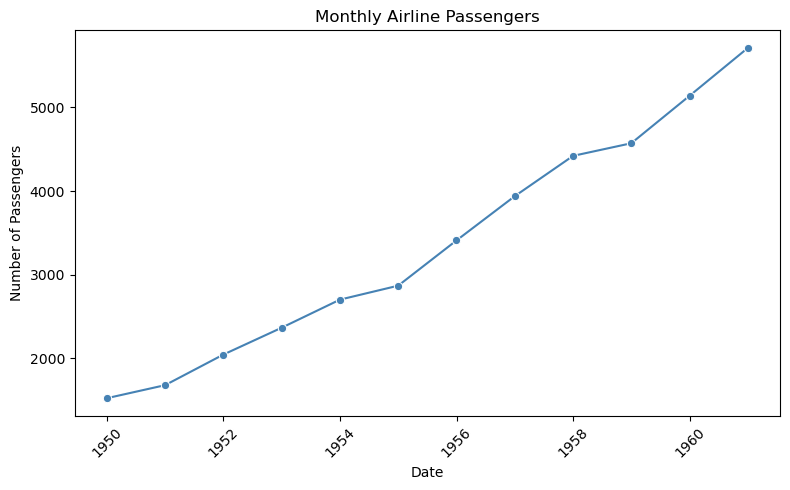

In [205]:
%matplotlib inline
plt.figure(figsize = (8, 5))
sns.lineplot(data = yearly_passengers, x = 'date', y = 'total_passengers', marker = 'o', color = 'steelblue')
plt.title("Monthly Airline Passengers")
plt.xlabel("Date")
plt.ylabel("Number of Passengers")
plt.xticks(rotation=45)
plt.tight_layout()

###  Upsampling and Interpolation

Upsampling increases the frequency of your data (e.g., from monthly to daily). When upsampling, new rows will have missing values, which you can fill using methods like forward-fill (ffill) or interpolation.

In [206]:
date_rng = pd.date_range(start='2024-01-01', end='2024-01-10', freq='D')
df = pd.DataFrame({'date': date_rng, 'value': np.random.randint(10, 100, size=len(date_rng))})
df = df.set_index('date')

In [207]:
df

,value
date,
2024-01-01,53
2024-01-02,99
2024-01-03,73
2024-01-04,77
2024-01-05,19
2024-01-06,89
2024-01-07,94
2024-01-08,33
2024-01-09,33


In [208]:
df.resample('h').asfreq().head(25)

,value
date,
2024-01-01 00:00:00,53.0
2024-01-01 01:00:00,NaN
2024-01-01 02:00:00,NaN
2024-01-01 03:00:00,NaN
2024-01-01 04:00:00,NaN
2024-01-01 05:00:00,NaN
2024-01-01 06:00:00,NaN
2024-01-01 07:00:00,NaN
2024-01-01 08:00:00,NaN


In [209]:
# Filling missing values with ffill method
df.resample('h').ffill().head(30)

,value
date,
2024-01-01 00:00:00,53
2024-01-01 01:00:00,53
2024-01-01 02:00:00,53
2024-01-01 03:00:00,53
2024-01-01 04:00:00,53
2024-01-01 05:00:00,53
2024-01-01 06:00:00,53
2024-01-01 07:00:00,53
2024-01-01 08:00:00,53
